In [3]:
import matplotlib.pyplot as pl
import numpy as np

In [4]:
def func(t,y):
    f = -2*y*t - 2*t**3
    return f

def func1(t,y):
    # pendulum
    f = y[1]
    # predator-prey
    #f = 0.3*y[0]*y[1]-0.8*y[0]
    return f
def func2(t,y):
    # pendulum
    c = 0.05 # dry place
    #c = 0.18 # humid envronment
    L = 1
    m = 0.5
    g = 9.81
    f = -c/m * y[1] - g/L * np.sin(y[0])
    # predator-prey
    #f = 1.1*y[1] - y[0]*y[1]
    return f

In [5]:
# Forward Euler
def FwEuler(t0,y0,h,tend):
    # compose nodal times
    t = np.arange(t0,tend+h,h)
    # determine the number of time steps
    N = len(t)
    # allocate output array
    y = np.ndarray(N)
    # initialise the solution
    t[0] = t0
    y[0] = y0
    # compute the solution incrementally at subsequent time steps
    for n in range(1,N):
        y[n] = y[n-1] + func(t[n-1],y[n-1]) * h
    return (t,y)


In [6]:
# RK4
def RK4(t0,y0,h,tend):
    # compose nodal times
    t = np.arange(t0,tend+h,h)
    # determine the number of time steps
    N = len(t)
    # allocate output array
    y = np.ndarray(N)
    # initialise the solution
    t[0] = t0
    y[0] = y0
    # compute the solution incrementally at subsequent time steps
    for n in range(1,N):
        k1 = h * func(t[n-1],y[n-1])
        k2 = h * func(t[n-1]+0.5*h,y[n-1]+0.5*k1)
        k3 = h * func(t[n-1]+0.5*h,y[n-1]+0.5*k2)
        k4 = h * func(t[n-1]+h,y[n-1]+k3)
        y[n] = y[n-1] + 1/6*(k1+2*k2+2*k3+k4)
    return (t,y)


In [7]:
# Backward Euler
def BwEuler(t0,y0,h,tend):
    # compose nodal times
    t = np.arange(t0,tend+h,h)
    # determine the number of time steps
    N = len(t)
    # allocate output array
    y = np.ndarray(N)
    # initialise the solution
    t[0] = t0
    y[0] = y0
    # compute the solution incrementally at subsequent time steps, for specified ODE
    for n in range(1,N):
        y[n] = (y[n-1] - 2*h*t[n]**3) / (1 + 2*h*t[n])
    return (t,y)

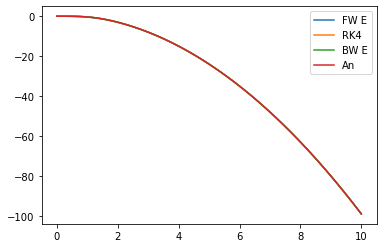

In [8]:
# test the methods
# set step, initial condition, final tend of marching computation
h = 0.1
y0 = 0
t0 = 0
tend = 10
# apply various methods
(t,y) = FwEuler(t0,y0,h,tend)
pl.plot(t,y)
(t,y) = RK4(t0,y0,h,tend)
pl.plot(t,y)
(t,y) = BwEuler(t0,y0,h,tend)
pl.plot(t,y)
# analytical solution
yan = 1-t**2+(y0-1)*np.exp(-t**2)
pl.plot(t,yan)
pl.legend(['FW E','RK4','BW E','An'])

In [9]:
# System of two ODEs with Forward Euler
def FwEulerTwo(Y0,t0,tend,h):
    # compose nodal times
    t = np.arange(t0,tend+h,h)
    # determine the number of time steps
    N = len(t)
    # allocate output array
    Y = np.ndarray((2,N))
    # initialise the solution
    t[0] = t0
    Y[0,0] = Y0[0]
    Y[1,0] = Y0[1]
    # compute the solution incrementally at subsequent time steps
    for n in range(1,N):
        Y[0,n] = Y[0,n-1] + func1(t[n-1],Y[:,n-1]) * h
        Y[1,n] = Y[1,n-1] + func2(t[n-1],Y[:,n-1]) * h
    return (t,Y)
    

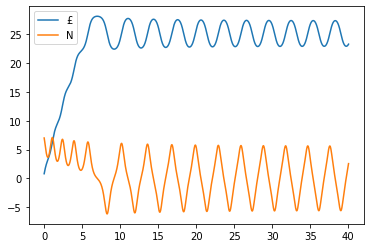

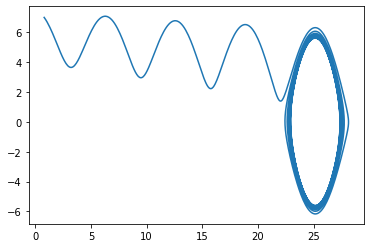

In [10]:
# set the initial coditions for predator-prey problem
Y0 = np.ndarray(2)
Y0[0] = 0.8 # rental price  (in k£)
Y0[1] = 7 # number of inhabitants (in millions)

# remember to set F1 and F2 in func1 and func2
(t,Y) = FwEulerTwo(Y0,0,40,0.019)
pl.plot(t,Y[0,:])
pl.plot(t,Y[1,:])
pl.legend(['£','N'])
pl.show()

pl.plot(Y[0,:],Y[1,:])


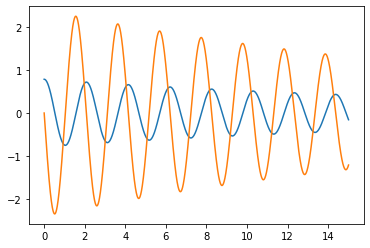

In [11]:
# set the initial coditions
Y0 = np.ndarray(2)
Y0[0] = np.pi/4  # initial velocity = 0 (system at rest at the beginning)
Y0[1] = 0  # initial angle displacement

# remember to set F1 and F2 in func1 and func2
(t,Y) = FwEulerTwo(Y0,0,15,0.002)

pl.plot(t,Y[0,:])
pl.plot(t,Y[1,:])
